# PGS CTD Biota ADCP tutorial

In [ ]:
!pip install -U odp-sdk --quiet && pip list | grep odp
!pip install -U pydeck --quiet && pip list | grep pydeck
!pip install -U matplotlib --quiet && pip list | grep matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
odp-dto                         0.7.11
odp-sdk                         0.27.11


## 1.1 Setup ODP Client

In [49]:
from odp.client import OdpClient # The SDK

import pandas as pd
import pydeck as pdk
import matplotlib.pyplot as plt
from shapely.geometry import box, LineString, mapping
from helper_functions import convert_geometry_field, wkt_to_edges

### 1.1.2 Geometric Plot Helper

In [35]:
# loading a simple function to make a nice map display of points
def simple_pydeck_plot(geojson_lists, size=1, lat=0, lon=0, zoom=2):
    colors = [(3, 255, 209), (255, 216, 11), (157, 89, 244), (254, 119, 76)]  # Cyan, Yellow, Purple, Orange
    layers = []
    for i, geojson_list in enumerate(geojson_lists):
        layer = pdk.Layer("GeoJsonLayer", data=convert_geometry_field(geojson_list), lineWidthMinPixels=size, pointRadiusMinPixels=size, pickable=True, get_line_color=colors[i % len(colors)], get_fill_color=colors[i % len(colors)],)
        layers.append(layer)
    r = pdk.Deck(layers=layers, initial_view_state=(pdk.ViewState(latitude=lat, longitude=lon, zoom=zoom)), map_provider="mapbox", map_style='mapbox://styles/oceandatafoundation/clwg6xklg00an01pcgmeufjxq', api_keys={'mapbox': 'pk.eyJ1Ijoib2NlYW5kYXRhZm91bmRhdGlvbiIsImEiOiJjazk5bGxpNWkwYWU1M2Vya3hkcHh4czdrIn0.yf7kIiPfDNE7KP9_9wTN6A'})
    return r

In [36]:
client = OdpClient()

### 2.1 Fetch Metadata from Catalog
- Option 1) via API calls to the catalog
- Option 2) getting UUID from the landing page:
https://app.hubocean.earth/catalog/dataset/1e3401d4-9630-40cd-a9cf-d875cb310449-mammals_survey_concentrated
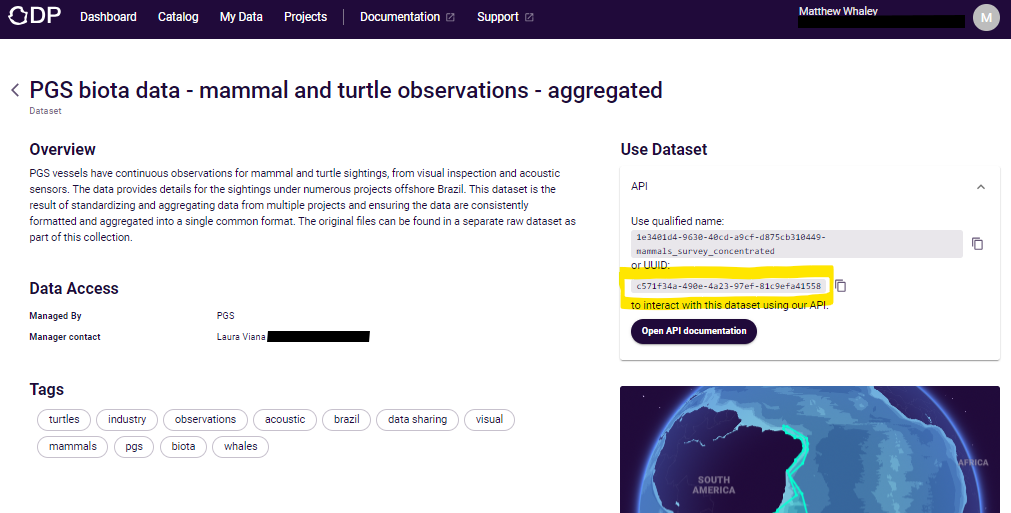

#### 2.2 Create a geospatial query
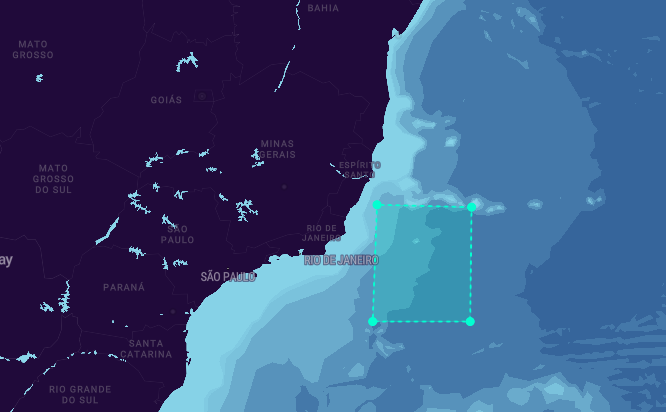

In [37]:
bbox_lat_min = -26
bbox_lat_max = -21
bbox_lon_min = -40
bbox_lon_max = -35

geospatial_query = box(
    bbox_lon_min, bbox_lat_min,
    bbox_lon_max, bbox_lat_max
).wkt
bbox_list = wkt_to_edges(geospatial_query)

## 3.3 Fetch data


### 3.3.1 Fetch data with geospatial query

In [38]:
ctd = client.catalog.get("67465006-8880-4a18-a867-f219c2c765fa")
print(ctd.metadata.display_name)

ctd_dataset = client.table_v2(ctd)

pages = list(
    ctd_dataset
      .select(f"geometry within '{geospatial_query}' AND Depth_m < 5")
      .pages()
)

CTD_data = [row for page in pages for row in page]

/var/folders/cw/0tbyc4jn4f7_m56v_lszbkkr0000gn/T/ipykernel_88954/386420474.py:1: DeprecationWarning: catalog class is deprecated and will be removed in a future versions. Use catalog_v2 class instead.
  ctd = client.catalog.get("67465006-8880-4a18-a867-f219c2c765fa")


PGS physics data - CTD profiles - aggregated


### 3.3.2 Fetch data with geospatial query

In [39]:
biota = client.catalog.get("53697b8b-a570-48a4-b873-85dd0000fdd6")
print(biota.metadata.display_name)

biota_dataset = client.table_v2(biota)

pages = list(
    biota_dataset
      .select(f"geometry within '{geospatial_query}'")
      .pages()
)

biota_data = [row for page in pages for row in page]

/var/folders/cw/0tbyc4jn4f7_m56v_lszbkkr0000gn/T/ipykernel_88954/2621383336.py:1: DeprecationWarning: catalog class is deprecated and will be removed in a future versions. Use catalog_v2 class instead.
  biota = client.catalog.get("53697b8b-a570-48a4-b873-85dd0000fdd6")


PGS biota data - mammal and turtle observations - aggregated


## 4.1 Visualize data

### 4.1.1 Plot datapoints from queries on a map with bounding box

In [40]:
simple_pydeck_plot([CTD_data, biota_data, bbox_list], zoom=6, lat=-23, lon=-39)

{
  "initialViewState": {
    "latitude": -23,
    "longitude": -39,
    "zoom": 6
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "Conduct_mS/cm": 55.23,
          "DatetimeUtc": {},
          "Density_sigma-T": 25.134,
          "Depth_m": 1.52,
          "Pressure_dBar": null,
          "ProfileName": "TS_Dip_2022001.xlsm_Profile # 11",
          "Project": "Tethys - Roncador",
          "Salinity_ppm": 37.115492784943,
          "Temp_C": 24.387,
          "Velocity_ms-1": 1535.22,
          "geometry": {
            "coordinates": [
              -39.863833,
              -21.9205
            ],
            "type": "Point"
          }
        },
        {
          "Conduct_mS/cm": 55.23,
          "DatetimeUtc": {},
          "Density_sigma-T": 25.155,
          "Depth_m": 1.5,
          "Pressure_dBar": null,
          "ProfileName": "TS_Dip_2022001.xlsm_Profile # 11",
          "Project": "Tethys - Roncador",
          "Salinity_ppm": 37.1346053720577,
          "Temp_C": 24.364,
          "Velocity_ms-1": 1535.19,
          "geometry": {
            "coordinates": [
              -39.863833,
              -21.9205
            ],
            "type": "Point"
          }
        },
        {
          "Conduct_mS/cm": 55.26,
          "DatetimeUtc": {},
          "Density_sigma-T": 25.181,
          "Depth_m": 1.42,
          "Pressure_dBar": null,
          "ProfileName": "TS_Dip_2022001.xlsm_Profile # 11",
          "Project": "Tethys - Roncador",
          "Salinity_ppm": 37.1648757146299,
          "Temp_C": 24.355,
          "Velocity_ms-1": 1535.2,
          "geometry": {
            "coordinates": [
              -39.863833,
              -21.9205
            ],
            "type": "Point"
          }
        },
        {
          "Conduct_mS/cm": 55.25,
          "DatetimeUtc": {},
          "Density_sigma-T": 25.176,
          "Depth_m": 1.24,
          "Pressure_dBar": null,
          "ProfileName": "TS_Dip_2022001.xlsm_Profile # 11",
          "Project": "Tethys - Roncador",
          "Salinity_ppm": 37.1590127668142,
          "Temp_C": 24.353,
          "Velocity_ms-1": 1535.18,
          "geometry": {
            "coordinates": [
              -39.863833,
              -21.9205
            ],
            "type": "Point"
          }
        },
        {
          "Conduct_mS/cm": 55.32,
          "DatetimeUtc": {},
          "Density_sigma-T": 25.215,
          "Depth_m": 1.12,
          "Pressure_dBar": null,
          "ProfileName": "TS_Dip_2022001.xlsm_Profile # 11",
          "Project": "Tethys - Roncador",
          "Salinity_ppm": 37.2113429238018,
          "Temp_C": 24.354,
          "Velocity_ms-1": 1535.24,
          "geometry": {
            "coordinates": [
              -39.863833,
              -21.9205
            ],
            "type": "Point"
          }
        },
        {
          "Conduct_mS/cm": 55.32,
          "DatetimeUtc": {},
          "Density_sigma-T": 25.217,
          "Depth_m": 1.57,
          "Pressure_dBar": null,
          "ProfileName": "TS_Dip_2022001.xlsm_Profile # 11",
          "Project": "Tethys - Roncador",
          "Salinity_ppm": 37.2111892627187,
          "Temp_C": 24.354,
          "Velocity_ms-1": 1535.24,
          "geometry": {
            "coordinates": [
              -39.863833,
              -21.9205
            ],
            "type": "Point"
          }
        },
        {
          "Conduct_mS/cm": 55.33,
          "DatetimeUtc": {},
          "Density_sigma-T": 25.225,
          "Depth_m": 2.27,
          "Pressure_dBar": null,
          "ProfileName": "TS_Dip_2022001.xlsm_Profile # 11",
          "Project": "Tethys - Roncador",
          "Salinity_ppm": 37.2185399126293,
          "Temp_C": 24.354,
          "Velocity_ms-1": 1535.26,
          "geometry": {
            "coordinates": [
              -39.863833,
              -21.9205
            ],
            "type": "Point"
          }
        },
    

## 5.1 Inspect data
### 5.1.1 Option 1): work with list of datapoints

In [41]:
#inspecting the fifth item of the list (numbering starts from 0)
biota_data[4:5]

[{'UID': 'pgs_mammals_aggregated_374',
  'SourceFile': 'BD_Caxareu_Pirambu.xls',
  'SourceID': 'C2077',
  'LowestTaxon': 'Baleia não identificada ',
  'HigherTaxon': 'Mysticeti ',
  'Juveniles': None,
  'Adults': 1.0,
  'Bathymetry': 2052.0,
  'DateTimeStartedGMT-3': '2010-05-06T13:29:00',
  'DateTimeStart': '06/05/2010 13:29',
  'Duration': None,
  'Acoustic': 0.0,
  'IBAMACode': 'RSov009',
  'geometry': {'type': 'Point', 'coordinates': [-39.486667, -21.439167]}}]

### 5.1.2 Option 2): convert from the list to a pandas dataframe

In [42]:
pd.DataFrame(biota_data).head()

,UID,SourceFile,SourceID,LowestTaxon,HigherTaxon,Juveniles,Adults,Bathymetry,DateTimeStartedGMT-3,DateTimeStart,Duration,Acoustic,IBAMACode,geometry
0,pgs_mammals_aggregated_369,BD_Caxareu_Pirambu.xls,C2072,Cetáceo não identificado,Cetacea,NaN,1.0,3410.0,2010-04-25T06:20:00,25/04/2010 06:20,NaN,0.0,RSov004,"{'type': 'Point', 'coordinates': [-38.325, -21..."
1,pgs_mammals_aggregated_370,BD_Caxareu_Pirambu.xls,C2073,Cetáceo não identificado,Cetacea,NaN,1.0,1787.0,2010-04-28T13:41:00,28/04/2010 13:41,NaN,0.0,RSov005,"{'type': 'Point', 'coordinates': [-39.766944, ..."
2,pgs_mammals_aggregated_371,BD_Caxareu_Pirambu.xls,C2074,Golfinho-de-Risso (Grampus griseus),Delphinidae,NaN,15.0,2643.0,2010-04-29T10:01:00,29/04/2010 10:01,NaN,0.0,RSov006,"{'type': 'Point', 'coordinates': [-38.900278, ..."
3,pgs_mammals_aggregated_372,BD_Caxareu_Pirambu.xls,C2075,Golfinho-de-Risso (Grampus griseus),Delphinidae,NaN,20.0,1732.0,2010-05-01T15:20:00,01/05/2010 15:20,NaN,0.0,RSov007,"{'type': 'Point', 'coordinates': [-39.737222, ..."
4,pgs_mammals_aggregated_374,BD_Caxareu_Pirambu.xls,C2077,Baleia não identificada,Mysticeti,NaN,1.0,2052.0,2010-05-06T13:29:00,06/05/2010 13:29,NaN,0.0,RSov009,"{'type': 'Point', 'coordinates': [-39.486667, ..."


### 5.1.3 Option 3): use 'select().dataframes()' function of the SDK

In [44]:
df_geo = pd.concat(biota_dataset.select(f"geometry within '{geospatial_query}'").dataframes(), ignore_index=True)
df_geo.head()

,UID,SourceFile,SourceID,LowestTaxon,HigherTaxon,Juveniles,Adults,Bathymetry,DateTimeStartedGMT-3,DateTimeStart,Duration,Acoustic,IBAMACode,geometry
0,pgs_mammals_aggregated_369,BD_Caxareu_Pirambu.xls,C2072,Cetáceo não identificado,Cetacea,NaN,1.0,3410.0,2010-04-25T06:20:00,25/04/2010 06:20,NaN,0.0,RSov004,POINT (-38.325 -21.340278)
1,pgs_mammals_aggregated_370,BD_Caxareu_Pirambu.xls,C2073,Cetáceo não identificado,Cetacea,NaN,1.0,1787.0,2010-04-28T13:41:00,28/04/2010 13:41,NaN,0.0,RSov005,POINT (-39.766944 -21.333889)
2,pgs_mammals_aggregated_371,BD_Caxareu_Pirambu.xls,C2074,Golfinho-de-Risso (Grampus griseus),Delphinidae,NaN,15.0,2643.0,2010-04-29T10:01:00,29/04/2010 10:01,NaN,0.0,RSov006,POINT (-38.900278 -21.37)
3,pgs_mammals_aggregated_372,BD_Caxareu_Pirambu.xls,C2075,Golfinho-de-Risso (Grampus griseus),Delphinidae,NaN,20.0,1732.0,2010-05-01T15:20:00,01/05/2010 15:20,NaN,0.0,RSov007,POINT (-39.737222 -21.483611)
4,pgs_mammals_aggregated_374,BD_Caxareu_Pirambu.xls,C2077,Baleia não identificada,Mysticeti,NaN,1.0,2052.0,2010-05-06T13:29:00,06/05/2010 13:29,NaN,0.0,RSov009,POINT (-39.486667 -21.439167)


## 6.1 Plot detailed CTD data

### 6.1.1 Geospatial query and get data directly to dataframe

In [45]:
ctd_dataset = client.table_v2(ctd)

CTD_df = pd.concat(ctd_dataset.select(f"geometry within '{geospatial_query}'").dataframes(), ignore_index=True)

In [46]:
CTD_df.head()

,Temp_C,Salinity_ppm,Project,Velocity_ms-1,ProfileName,Pressure_dBar,Density_sigma-T,DatetimeUtc,Conduct_mS/cm,geometry,Depth_m
0,24.387,37.115493,Tethys - Roncador,1535.22,TS_Dip_2022001.xlsm_Profile # 11,NaN,25.134,2022-07-23 16:00:07,55.23,POINT (-39.863833 -21.9205),1.52
1,24.364,37.134605,Tethys - Roncador,1535.19,TS_Dip_2022001.xlsm_Profile # 11,NaN,25.155,2022-07-23 16:00:08,55.23,POINT (-39.863833 -21.9205),1.50
2,24.355,37.164876,Tethys - Roncador,1535.20,TS_Dip_2022001.xlsm_Profile # 11,NaN,25.181,2022-07-23 16:00:09,55.26,POINT (-39.863833 -21.9205),1.42
3,24.353,37.159013,Tethys - Roncador,1535.18,TS_Dip_2022001.xlsm_Profile # 11,NaN,25.176,2022-07-23 16:00:10,55.25,POINT (-39.863833 -21.9205),1.24
4,24.354,37.211343,Tethys - Roncador,1535.24,TS_Dip_2022001.xlsm_Profile # 11,NaN,25.215,2022-07-23 16:00:11,55.32,POINT (-39.863833 -21.9205),1.12


### 6.2 Plot data

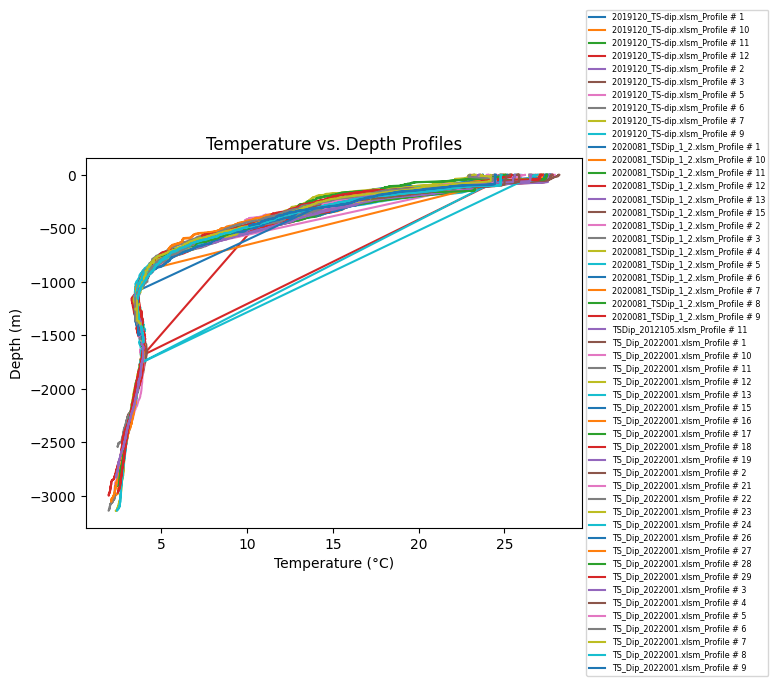

In [50]:
groupedCTD = CTD_df.groupby('ProfileName')
for name, group in groupedCTD:
    plt.plot(group['Temp_C'], group['Depth_m']*-1, label=name)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature vs. Depth Profiles')
plt.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))  # Set the legend font size to 'small'
plt.show()